#  Aprendizagem Automática
## Projeto nº 4
### Introdução à Inteligência Artificial - edição 2020/21

## Grupo: 42

### Elementos do Grupo

Nome: Ivo Veiga

Número: 44865

Nome: João Silva

Número: 48782

Nome: Manuel Tovar

Número: 49522

## Relatório

Imports dos módulos necessários:

In [1]:
from sklearn.tree import DecisionTreeClassifier, plot_tree # árvore de decisão
from sklearn.neighbors import KNeighborsClassifier # k-NN
from sklearn.model_selection import train_test_split, cross_val_score # cross-validation
import numpy as np 
import matplotlib.pyplot as plt # gráficos
from utilsAA import *

### 1. Carregar o conjunto de dados
Carregam-se os dados no ficheiro `airline.csv` usando a função `load_data` do módulo `utilsAA`. Como é o conjunto de treino, a opção `testdata = False` é usada (por defeito).

In [2]:
table_X, table_y, features, target = load_data("airline.csv")

Os dados devem ter 778 linhas e 19 colunas:

In [3]:
print(table_X.shape)

(778, 19)


Exemplos dos 4 primeiros datapoints carregados:

In [4]:
print("Os dados: ", table_X[:4], sep='\n')
print("\nAs correspondentes classes: ", table_y[:4])
print("\nOs nomes dos atributos: ", features)
print("\nO nome da classe: ", target)

Os dados: 
[[29 'Male' 'Loyal Customer' 22 'Personal Travel' 'Eco' 2342 3 3 3 3 1 3
  2 4 3 4 2 3]
 [100 'Female' 'Loyal Customer' 16 'Personal Travel' 'Eco' 332 2 2 3 2 4
  3 5 4 5 4 4 3]
 [124 'Male' 'Loyal Customer' 62 'Personal Travel' 'Eco' 2521 4 4 4 1 1 5
  3 5 4 1 4 1]
 [351 'Female' 'Loyal Customer' 34 'Business travel' 'Business' 1825 2 2
  3 3 5 5 5 4 5 3 5 3]]

As correspondentes classes:  ['neutral or dissatisfied' 'neutral or dissatisfied'
 'neutral or dissatisfied' 'satisfied']

Os nomes dos atributos:  ['Client id' 'Gender' 'Customer Type' 'Age' 'Type of Travel' 'Class'
 'Flight Distance' 'Inflight wifi service' 'Ease of Online booking'
 'Food and drink' 'Online boarding' 'Seat comfort'
 'Inflight entertainment' 'On-board service' 'Leg room service'
 'Baggage handling' 'Checkin service' 'Inflight service' 'Cleanliness']

O nome da classe:  satisfaction


### 2. Processar os dados
Como `Client id` é apenas um identificador do cliente, não é relevante para o modelo e é por isso removido.

In [5]:
tab_X = table_X[:,1:]
tab_X[:4]

array([['Male', 'Loyal Customer', 22, 'Personal Travel', 'Eco', 2342, 3,
        3, 3, 3, 1, 3, 2, 4, 3, 4, 2, 3],
       ['Female', 'Loyal Customer', 16, 'Personal Travel', 'Eco', 332, 2,
        2, 3, 2, 4, 3, 5, 4, 5, 4, 4, 3],
       ['Male', 'Loyal Customer', 62, 'Personal Travel', 'Eco', 2521, 4,
        4, 4, 1, 1, 5, 3, 5, 4, 1, 4, 1],
       ['Female', 'Loyal Customer', 34, 'Business travel', 'Business',
        1825, 2, 2, 3, 3, 5, 5, 5, 4, 5, 3, 5, 3]], dtype=object)

In [6]:
feats = features[1:]
feats

array(['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Ease of Online booking', 'Food and drink', 'Online boarding',
       'Seat comfort', 'Inflight entertainment', 'On-board service',
       'Leg room service', 'Baggage handling', 'Checkin service',
       'Inflight service', 'Cleanliness'], dtype=object)

Assim, há menos uma coluna, ou seja, 18 colunas para 18 atributos.

In [7]:
print(tab_X.shape)
print(len(feats))

(778, 18)
18


Os atributos categóricos terão de ser convertidos para numéricos de modo a que os algoritmos do scikit-learn os possam usar. 

Dos atributos categóricos, aqueles com apenas dois valores possíveis serão convertidos para os números 0 ou 1 usando a função `encode_feature`. De modo a manter o significado categórico dos atributos, aqueles com 3 ou mais valores possíveis não poderão ser convertidos para valores numéricos que impliquem um outro significado que não o categórico (ex. ordem, importância, magnitude). Será por isso aplicado aos atributos com 3 ou mais valores o processo de *one hot encoding* usando a função `one_hot_encode_feature`.

Para descobrir o número de valores possíveis de cada atributo é usada a função `unique` do módulo `numpy`.

Este processo é automatizado na função `process_data`:

In [8]:
def process_data(tab_X, feats):
    temp_tabX = tab_X
    temp_feats = feats
    temp_col = None

    num_feats = len(temp_feats)
    col = 0

    while col < num_feats:
        temp_col = temp_tabX[:,col] #para cada atributo
        if type(temp_col[0]) == str: #se é categórico
            if len(np.unique(temp_col)) > 2:
                #se >2 valores possíveis faz one hot encode
                temp_tabX, temp_feats = one_hot_encode_feature(temp_tabX, col, temp_feats)            
                col -= 1 #one_hot_encode_feature remove uma coluna
                num_feats -= 1 #não repetir iterações
            else:
                #se 2 valores possíveis usa label encode
                temp_tabX[:,col] = encode_feature(temp_tabX[:,col])    
        col += 1
        
    return temp_tabX, temp_feats

E executado da seguinte maneira:

In [9]:
tab_X, feats = process_data(tab_X, feats)

print(tab_X[:4])
print(feats)

[[1.0 0.0 22 1.0 2342 3 3 3 3 1 3 2 4 3 4 2 3 0.0 1.0 0.0]
 [0.0 0.0 16 1.0 332 2 2 3 2 4 3 5 4 5 4 4 3 0.0 1.0 0.0]
 [1.0 0.0 62 1.0 2521 4 4 4 1 1 5 3 5 4 1 4 1 0.0 1.0 0.0]
 [0.0 0.0 34 0.0 1825 2 2 3 3 5 5 5 4 5 3 5 3 1.0 0.0 0.0]]
['Gender' 'Customer Type' 'Age' 'Type of Travel' 'Flight Distance'
 'Inflight wifi service' 'Ease of Online booking' 'Food and drink'
 'Online boarding' 'Seat comfort' 'Inflight entertainment'
 'On-board service' 'Leg room service' 'Baggage handling'
 'Checkin service' 'Inflight service' 'Cleanliness' 'Business' 'Eco'
 'Eco Plus']


Os atributos 'Gender', 'Customer Type' e 'Type of Travel' foram convertidos para valores numéricos de 0 ou 1 e o atributo 'Class' foi desdobrado nos atributos 'Business', 'Eco' e 'Eco Plus' cujos nomes são os valores que 'Class' pode tomar e cujos valores são 0 ou 1.

Sendo assim, os dados depois de processados têm 20 colunas (19 - 1 - 1 + 3).

In [10]:
print(tab_X.shape)
print(len(feats))

(778, 20)
20


### 3. Procura do melhor modelo
Serão testados os algoritmos árvores de decisão e k vizinhos mais próximos com diferentes combinações de parâmetros, sendo o melhor modelo aquele que obtiver maior accuracy nos testes de cross-validation.

De modo a reduzir o espaço de procura para os parâmetros óptimos, será primeiro testado cada parâmetro isoladamente mostrando um gráfico da evolução da accuracy ao longo da variação do parâmetro.

É usado o parâmetro `random_state` = 42 para que os resultados deste relatório sejam replicáveis.

#### Árvore de decisão
Para o algoritmo árvore de decisão serão testados os parâmetros ``max_depth``, ``min_samples_split`` e ``min_samples_leaf``.

Pode-se determinar o valor máximo a testar de `min_samples_split` visualizando o seu gráfico da accuracy. Para um dado valor do parâmetro, a sua accuracy é a média dos scores devolvidos pela função `cross_val_score` do scikit-learn, que treina um modelo e faz uma 10-fold cross-validation (cv=10). O gráfico irá mostrar valores de `min_samples_split` até ao número total de exemplares de treino (shape[0] é 778).

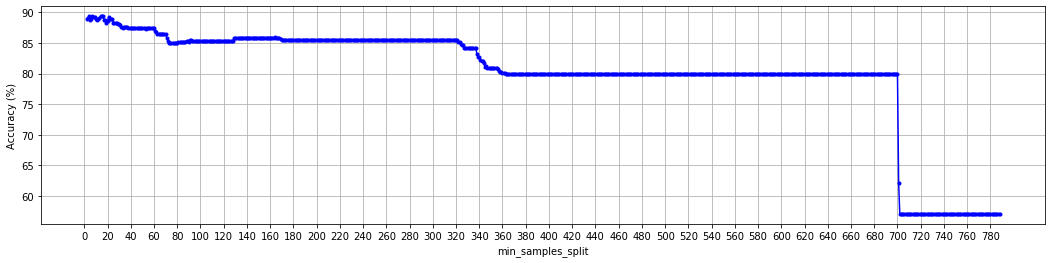

In [11]:
init_val = 2
max_val = tab_X.shape[0] + 10

cross_val_acc = []
for i in range(init_val, max_val+1):
    dtc = DecisionTreeClassifier(criterion='entropy', min_samples_split=i, random_state=42)
    scores = cross_val_score(dtc, X=tab_X, y=table_y, cv=10, n_jobs=-1)
    cross_val_acc.append(np.mean(scores)*100)

x = np.arange(init_val, max_val+1, 1)
fig, ax = plt.subplots()
ax.plot(x, cross_val_acc, 'b.-')
ax.set(xlabel='min_samples_split', ylabel='Accuracy (%)')
ax.set_xticks(np.arange(0, max_val+1, 20))
plt.grid()
fig.set_size_inches(18, 4)
plt.show()

Apesar da grande queda de accuracy ser por volta dos 700 exemplos no mínimo por nó, os valores consistentemente mais altos são até por volta de 30:

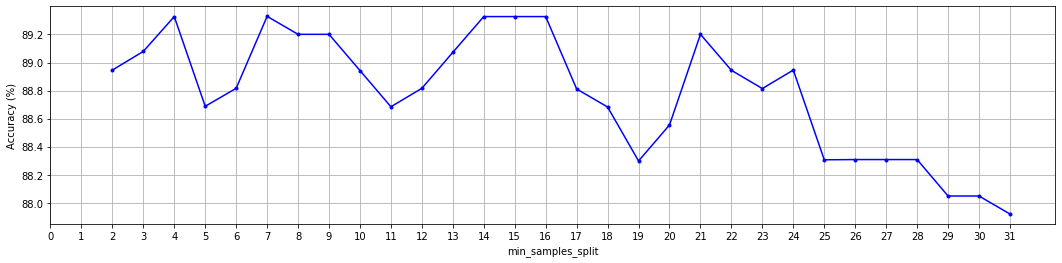

In [12]:
x = np.arange(init_val, 32, 1)
fig, ax = plt.subplots()
ax.plot(x, cross_val_acc[:30], 'b.-')
ax.set(xlabel='min_samples_split', ylabel='Accuracy (%)')
ax.set_xticks(np.arange(0, 32, 1))
plt.grid()
fig.set_size_inches(18, 4)
plt.show()

De modo a ter variação suficiente, `min_samples_split` será testado entre 2 e `max_min_samples_split`=25. 25 vem imediatamente a seguir a um máximo local, após o qual a accuracy nunca mais irá tomar valores maiores e é suficientemente grande para produzir várias combinações.

In [13]:
max_min_samples_split = 25

Quanto a `min_samples_leaf`, o processo é identico ao anterior.

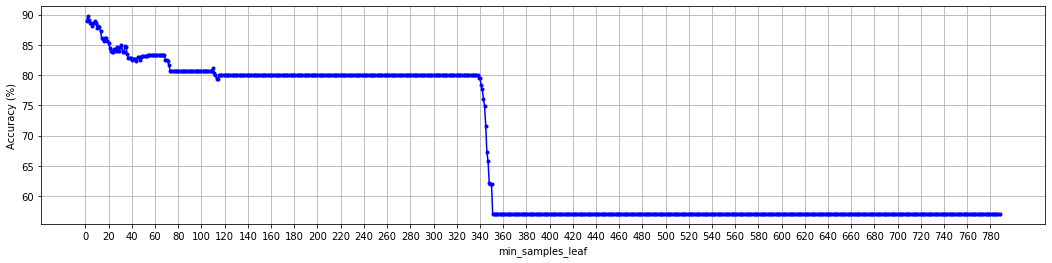

In [14]:
init_val = 1
max_val = tab_X.shape[0] + 10

cross_val_acc = []
for i in range(init_val, max_val+1):
    dtc = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=i, random_state=42)
    scores = cross_val_score(dtc, X=tab_X, y=table_y, cv=10, n_jobs=-1)
    cross_val_acc.append(np.mean(scores)*100)

x = np.arange(init_val, max_val+1, 1)
fig, ax = plt.subplots()
ax.plot(x, cross_val_acc, 'b.-')
ax.set(xlabel='min_samples_leaf', ylabel='Accuracy (%)')
ax.set_xticks(np.arange(0, max_val+1, 20))
plt.grid()
fig.set_size_inches(18, 4)
plt.show()

Apesar da grande queda de accuracy ser por volta dos 350 exemplos no mínimo por folha, os valores consistentemente mais altos são até por volta de 20:

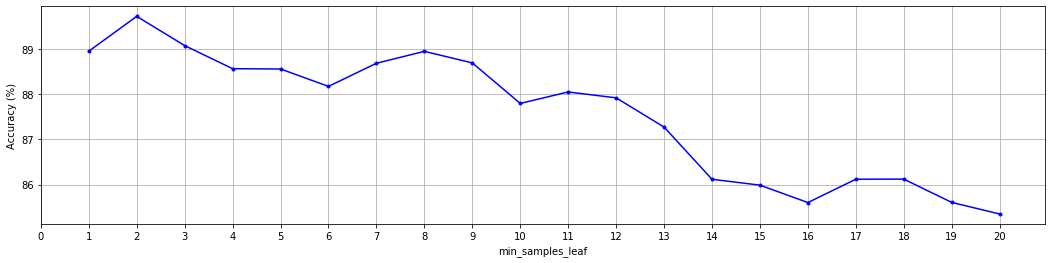

In [15]:
x = np.arange(init_val, 21, 1)
fig, ax = plt.subplots()
ax.plot(x, cross_val_acc[:20], 'b.-')
ax.set(xlabel='min_samples_leaf', ylabel='Accuracy (%)')
ax.set_xticks(np.arange(0, 21, 1))
plt.grid()
fig.set_size_inches(18, 4)
plt.show()

Ainda que a melhor accuracy conseguida tenha sido com `min_samples_leaf`=2, de modo a ter variação suficiente neste parâmetro, `min_samples_leaf` será testado entre 1 e `max_min_samples_leaf`=12. 12 vem imediatamente a seguir a um máximo local, após o qual a accuracy nunca mais irá tomar valores maiores e é suficientemente grande para produzir várias combinações.

In [16]:
max_min_samples_leaf = 12

No caso de ``max_depth``, os outros dois parâmetros vão influenciar a profundidade da árvore de modo que quanto maiores menos profunda a árvore. Assim, o tamanho máximo da árvore pode ser obtido usando os valores por defeito da classe ``DecisionTreeClassifier``, que são os valores mínimos viáveis para a execução do algoritmo.

In [17]:
dtc = DecisionTreeClassifier(criterion='entropy', random_state=42)
dtc.fit(tab_X,table_y)

max_max_depth = dtc.get_depth()
print(max_max_depth)

12


À semelhança do que foi feito para os outros dois parâmetros, pode-se usar o gráfico da evolução da accuracy para determinar o valor mínimo com que se começa a variar `max_depth`.

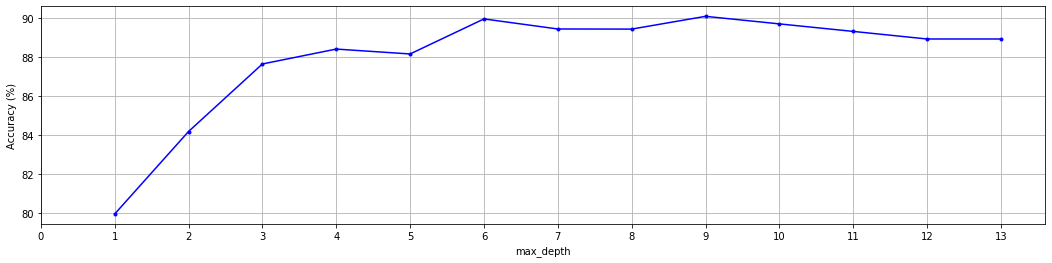

In [18]:
init_val = 1
max_val = max_max_depth + 2

cross_val_acc = []
for i in range(init_val, max_val):
    dtc = DecisionTreeClassifier(criterion='entropy', max_depth=i, random_state=42)
    scores = cross_val_score(dtc, X=tab_X, y=table_y, cv=10, n_jobs=-1)
    cross_val_acc.append(np.mean(scores)*100)

x = np.arange(init_val, max_val, 1)
fig, ax = plt.subplots()
ax.plot(x, cross_val_acc, 'b.-')
ax.set(xlabel='max_depth', ylabel='Accuracy (%)')
ax.set_xticks(np.arange(0, max_val, 1))
plt.grid()
fig.set_size_inches(18, 4)
plt.show()

O valor 3, por estar imediatamente antes de um máximo local, aparenta ser um bom valor mínimo.

`max_depth` será então testado com valores entre `min_max_depth` (que é 3) e `max_max_depth` (12).

In [19]:
min_max_depth = 3

Para determinar o melhor modelo, será, para cada combinação dos três parâmetros analisados anteriormente, calculada a accuracy, que será a média dos scores devolvidos pela função `cross_val_score` fazendo 10-fold cross-validation (cv=10). Será escolhido o maior valor de accuracy e os respectivos parâmetros serão considerados como os óptimos a usar para o algoritmo árvores de decisão.

Como determinado anteriormente, `max_depth` será variado entre `min_max_depth` (3) e `max_max_depth` (12), `min_samples_split` será variado entre 2 e `max_min_samples_split` (25) e `min_samples_leaf` será variado entre 1 e `max_min_samples_leaf` (12).

In [20]:
print(min_max_depth, max_max_depth, max_min_samples_split, max_min_samples_leaf)

3 12 25 12


In [21]:
best_acc_score = 0
best_max_depth = 0
best_min_samples_split = 0
best_min_samples_leaf = 0
best_dtc = None

for i in range(min_max_depth, max_max_depth + 1):
    print(i, "...", end='', sep='')
    for j in range(2, max_min_samples_split + 1):
        for k in range(1, max_min_samples_leaf + 1):
            dtc = DecisionTreeClassifier(criterion='entropy', max_depth=i, min_samples_split=j, min_samples_leaf=k, random_state=42)
            scores = cross_val_score(dtc, X=tab_X, y=table_y, cv=10, n_jobs=-1)            
            acc_score = np.mean(scores)   
            if acc_score > best_acc_score:
                best_dtc = dtc
                best_acc_score = acc_score
                best_max_depth = i
                best_min_samples_split = j
                best_min_samples_leaf = k

print("\nMelhores valores:")
print("best_acc_score = ", best_acc_score)
print("max_depth = ", best_max_depth)
print("min_samples_split = ", best_min_samples_split)
print("min_samples_leaf = ", best_min_samples_leaf)
print("Melhor modelo DTC: ", best_dtc)

3...4...5...6...7...8...9...10...11...12...
Melhores valores:
best_acc_score =  0.9048951048951048
max_depth =  6
min_samples_split =  12
min_samples_leaf =  1
Melhor modelo DTC:  DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split=12,
                       random_state=42)


Os melhores valores dos parâmetros são então:
- `max_depth` = 6
- `min_samples_split` = 12
- `min_samples_leaf`= 1

Com estes valores, para o algoritmo árvore de decisão, obtém-se uma accuracy média de aproximadamente 90.48951% (com random_state=42 e 10-fold cross-validation). O melhor DecisionTreeClassifier é:

In [22]:
best_dtc.fit(tab_X,table_y)
best_dtc

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split=12,
                       random_state=42)

#### K vizinhos mais próximos
Para o modelo usando o algoritmo k vizinhos mais próximos o processo é identico ao anterior, sendo que o único parâmetro a variar é o `n_neighbors`. O valor máximo de vizinhos a testar será o número de exemplos de treino e como será feita 10-fold cross-validation este número será 9/10 do conjunto total em `tab_X`.

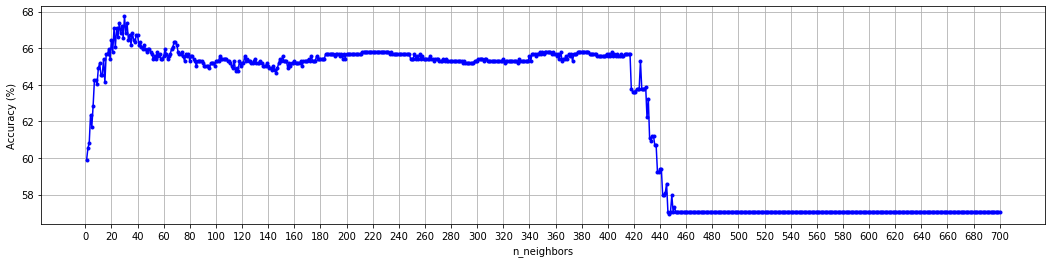

In [23]:
init_val = 1
max_val = int(tab_X.shape[0] * 9/10)

cross_val_acc = []
for i in range(init_val, max_val+1):
    knc = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    scores = cross_val_score(knc, X=tab_X, y=table_y, cv=10, n_jobs=-1)
    cross_val_acc.append(np.mean(scores)*100)

x = np.arange(init_val, max_val+1, 1)
fig, ax = plt.subplots()
ax.plot(x, cross_val_acc, 'b.-')
ax.set(xlabel='n_neighbors', ylabel='Accuracy (%)')
ax.set_xticks(np.arange(0, max_val+1, 20))
plt.grid()
fig.set_size_inches(18, 4)
plt.show()

Observa-se que o melhor valor de `n_neighbors` é aproximadamente 30. Pode-se confirmar o valor exato:

In [24]:
best_acc_score = 0
best_n_neighbors = 0
best_knc = None
for i in range(10, 50):
    knc = KNeighborsClassifier(n_neighbors=i, n_jobs=-1)
    scores = cross_val_score(knc, X=tab_X, y=table_y, cv=10, n_jobs=-1)            
    acc_score = np.mean(scores)   
    if acc_score > best_acc_score:
        best_knc = knc
        best_acc_score = acc_score
        best_n_neighbors = i            

print("\nMelhores valores:")
print("best_acc_score = ", best_acc_score)
print("n_neighbors = ", best_n_neighbors)
print("Melhor modelo KNC: ", best_knc)


Melhores valores:
best_acc_score =  0.6774225774225775
n_neighbors =  30
Melhor modelo KNC:  KNeighborsClassifier(n_jobs=-1, n_neighbors=30)


Para o algoritmo k vizinhos mais próximos, a melhor accuracy média obtida foi de aproximadamente 67.742% , com `n_neighbors` = 30.

In [25]:
best_knc

KNeighborsClassifier(n_jobs=-1, n_neighbors=30)

Conclui-se então que, por apresentar maior accuracy média, o modelo usando o algoritmo árvore de decisão com parâmetros `max_depth` = 6, `min_samples_split` = 12 e `min_samples_leaf`= 1 é o melhor a aplicar ao conjunto de dados `airline.csv`:

In [26]:
best_dtc

DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_split=12,
                       random_state=42)

### 4. Gravar as previsões para o conjunto de teste fornecido
Usando o melhor modelo criado anteriormente (`best_dtc`) serão feitas as previsões das classes dos dados de teste em `test.csv`.

Carregamento do ficheiro `test.csv`, que como é um conjunto de dados de teste, será feito usando a opção `testdata`=True:

In [27]:
table_X, features = load_data("test.csv", testdata=True)

Os dados devem ter 260 linhas e 19 colunas:

In [28]:
print(table_X.shape)
print(len(features))

(260, 19)
19


Exemplos dos 4 primeiros datapoints carregados:

In [29]:
print("Os dados: ", table_X[:4], sep='\n')
print("\nOs nomes dos atributos: ", features)

Os dados: 
[[98915 'Female' 'Loyal Customer' 26 'Personal Travel' 'Eco' 1569 1 1 3 1
  3 3 3 2 4 4 4 3]
 [42606 'Female' 'Loyal Customer' 39 'Personal Travel' 'Eco' 964 4 4 2 4
  2 2 5 3 4 5 4 2]
 [99566 'Female' 'Loyal Customer' 63 'Personal Travel' 'Eco' 163 1 1 3 4
  5 1 1 1 1 3 1 3]
 [33105 'Male' 'disloyal Customer' 27 'Business travel' 'Eco Plus' 2454 2
  2 2 2 2 2 4 1 2 2 4 2]]

Os nomes dos atributos:  ['Client id' 'Gender' 'Customer Type' 'Age' 'Type of Travel' 'Class'
 'Flight Distance' 'Inflight wifi service' 'Ease of Online booking'
 'Food and drink' 'Online boarding' 'Seat comfort'
 'Inflight entertainment' 'On-board service' 'Leg room service'
 'Baggage handling' 'Checkin service' 'Inflight service' 'Cleanliness']


O mesmo tipo de processamento de dados usado nos dados de treino será aplicado aos dados de teste.

Remoção da coluna 'Client id':

In [30]:
tab_X = table_X[:,1:]
print(tab_X[:4])
feats = features[1:]
print(feats)

[['Female' 'Loyal Customer' 26 'Personal Travel' 'Eco' 1569 1 1 3 1 3 3 3
  2 4 4 4 3]
 ['Female' 'Loyal Customer' 39 'Personal Travel' 'Eco' 964 4 4 2 4 2 2 5
  3 4 5 4 2]
 ['Female' 'Loyal Customer' 63 'Personal Travel' 'Eco' 163 1 1 3 4 5 1 1
  1 1 3 1 3]
 ['Male' 'disloyal Customer' 27 'Business travel' 'Eco Plus' 2454 2 2 2 2
  2 2 4 1 2 2 4 2]]
['Gender' 'Customer Type' 'Age' 'Type of Travel' 'Class' 'Flight Distance'
 'Inflight wifi service' 'Ease of Online booking' 'Food and drink'
 'Online boarding' 'Seat comfort' 'Inflight entertainment'
 'On-board service' 'Leg room service' 'Baggage handling'
 'Checkin service' 'Inflight service' 'Cleanliness']


Conversão dos dados categóricos para dados numéricos:

In [31]:
tab_X, feats = process_data(tab_X, feats)

print(tab_X[:4])
print(feats)

[[0.0 0.0 26 1.0 1569 1 1 3 1 3 3 3 2 4 4 4 3 0.0 1.0 0.0]
 [0.0 0.0 39 1.0 964 4 4 2 4 2 2 5 3 4 5 4 2 0.0 1.0 0.0]
 [0.0 0.0 63 1.0 163 1 1 3 4 5 1 1 1 1 3 1 3 0.0 1.0 0.0]
 [1.0 1.0 27 0.0 2454 2 2 2 2 2 2 4 1 2 2 4 2 0.0 0.0 1.0]]
['Gender' 'Customer Type' 'Age' 'Type of Travel' 'Flight Distance'
 'Inflight wifi service' 'Ease of Online booking' 'Food and drink'
 'Online boarding' 'Seat comfort' 'Inflight entertainment'
 'On-board service' 'Leg room service' 'Baggage handling'
 'Checkin service' 'Inflight service' 'Cleanliness' 'Business' 'Eco'
 'Eco Plus']


Tal como os dados treino, os dados de teste processados têm 20 colunas:

In [32]:
print(tab_X.shape)
print(len(feats))

(260, 20)
20


Efetuam-se as previsões:

In [33]:
pred = best_dtc.predict(tab_X)

As 10 primeiras previsões das classes:

In [34]:
pred[:10]

array(['neutral or dissatisfied', 'neutral or dissatisfied',
       'neutral or dissatisfied', 'neutral or dissatisfied',
       'neutral or dissatisfied', 'neutral or dissatisfied', 'satisfied',
       'neutral or dissatisfied', 'neutral or dissatisfied',
       'neutral or dissatisfied'], dtype=object)

Finalmente, usando a função `save_data`, guardam-se as previsões no ficheiro `IIA2021-proj4-42.csv`:

In [35]:
save_data("IIA2021-proj4-42.csv", pred)